In [4]:
############# Packages #############
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
def map(mu, x):
    return (-1)*x + mu*x + x**3 

def calc_orbit(x_init, mu, maxiter):
    x_lst = [x_init]
    for i in range(maxiter):
        curx = x_lst[-1]
        newx = map(mu, curx)
        x_lst.append(newx)
    return x_lst 

def plot_orbit_doubling(x_init_lst, maxiter):
    mu_lst = [-0.1, 0.0, 0.1]
    x_array = np.linspace(-0.5, 0.5, 151)
    x_array_reversed = np.linspace(0.5, -0.5, 151)
    map_lst = []; x_lst = []
    for i in range(len(mu_lst)):
        map_lst.append(map(mu_lst[i], x_array))
        x_eachmu = []
        for j in range(len(x_init_lst[i])):
            x_eachmu.append(calc_orbit(x_init=x_init_lst[i][j], mu=mu_lst[i], maxiter=maxiter))
        x_lst.append(x_eachmu)
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    for i in range(len(mu_lst)):
        axes[i].text(0.0, 0.4, r"$\mu = {}$".format(mu_lst[i]))
        axes[i].set_xlabel(r"$x$"); axes[i].set_ylabel(r"$f(x, \mu)$")
        axes[i].set_xlim([-0.5, 0.5]); axes[i].set_ylim([-0.5, 0.5])
        axes[i].plot(x_array, map_lst[i], c="k")
        axes[i].plot(x_array, x_array, c="k")
        axes[i].plot(x_array, x_array_reversed, c="k")
        for j in range(len(x_lst[i])):
            # scatter plot of x
            axes[i].scatter(x_lst[i][j], x_lst[i][j], c="k", marker=".")
            for k in range(len(x_lst[i][j]) - 1):
                axes[i].quiver(x_lst[i][j][k], x_lst[i][j][k], 0, (x_lst[i][j][k + 1] - x_lst[i][j][k]), scale_units='xy', scale=1)
                axes[i].quiver(x_lst[i][j][k], x_lst[i][j][k + 1], (x_lst[i][j][k + 1] - x_lst[i][j][k]), 0, scale_units='xy', scale=1)
    plt.savefig("./7.5_period_doubling_orbit.svg")

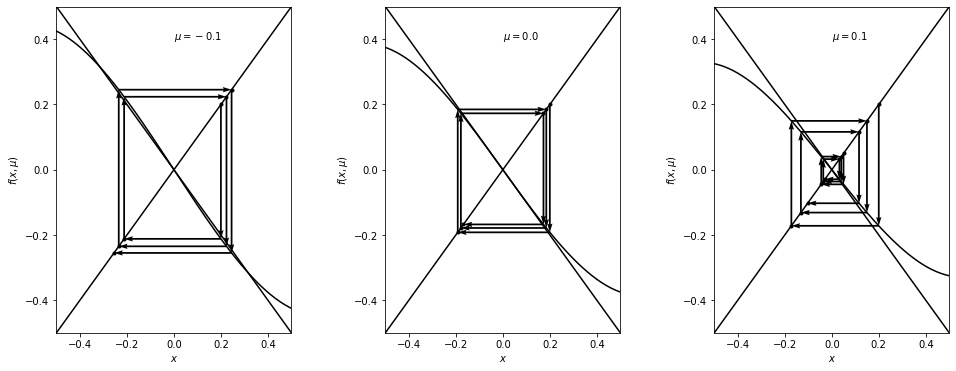

In [21]:
x_init_lst = [[0.2], [0.2], [0.2, 0.05]]
maxiter = 5
plot_orbit_doubling(x_init_lst, maxiter)